In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,classification_report
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
merged_df.to_csv("merged_data.csv", index=False)
dataset=merged_df
dataset


,Unnamed: 0,mu1,lam1,mu2,sigma2,w1,w2,Target,Stimulation
0,0,0.029823,0.023443,4.576032e-02,0.026799,0.788097,0.211903,0.0,0.0
1,0,0.028452,0.022634,4.559451e-02,0.027922,0.768587,0.231413,0.0,0.0
2,0,0.028697,0.023824,4.582815e-02,0.030433,0.784083,0.215917,0.0,0.0
3,0,0.030750,0.023242,4.411370e-02,0.023057,0.815669,0.184331,0.0,0.0
4,0,0.030043,0.022533,4.501446e-02,0.021350,0.815744,0.184256,0.0,0.0
...,...,...,...,...,...,...,...,...,...
806,0,0.050615,0.026634,2.284368e-02,0.096962,0.543674,0.456326,0.0,0.0
807,0,0.057555,0.028156,5.238110e-02,0.069447,0.576031,0.423969,0.0,0.0
808,0,0.053258,0.031079,2.295551e-07,0.108189,0.445401,0.554599,0.0,0.0
809,0,0.048767,0.026282,4.420579e-04,0.111178,0.451920,0.548080,0.0,0.0


dataset = pd.read_csv('Data after PP/Data')

### Only baseline

In [66]:
dataset = dataset[dataset['Stimulation'] != 1]
dataset

,Unnamed: 0,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0,0.029989,0.023791,0.050000,0.025455,0.301780,0.317919,0.814444,0.185555,4.704015e-07,0.0,1.0
1,0,0.030000,0.023087,0.050000,0.025142,0.273312,0.328372,0.813396,0.186604,3.058176e-12,0.0,1.0
2,0,0.028645,0.024061,0.050000,0.029190,0.180386,0.221539,0.804252,0.195748,2.771986e-30,0.0,1.0
3,0,0.030000,0.024694,0.050000,0.017556,0.272991,0.290797,0.918604,0.081396,5.773332e-11,0.0,1.0
4,0,0.030000,0.024102,0.051366,0.010000,0.255269,0.292689,0.917414,0.082586,2.747613e-15,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,0,0.030000,0.022657,0.050000,0.027277,0.100001,0.057532,0.583097,0.257282,1.596210e-01,0.0,1.0
433,0,0.030000,0.023670,0.050000,0.040929,0.240133,0.240503,0.661024,0.338976,5.419047e-10,0.0,1.0
434,0,0.030000,0.023743,0.050000,0.046941,0.221648,0.150496,0.660084,0.339913,2.286516e-06,0.0,1.0
435,0,0.030000,0.023481,0.050000,0.024746,0.100007,0.050629,0.634492,0.266342,9.916566e-02,0.0,1.0


### Dropping stimulation column

In [3]:
dataset=dataset.drop(['Stimulation'],axis=1)
dataset = dataset.drop(['Unnamed: 0'],axis=1)

In [4]:
dataset['Target'].value_counts()

0.0    406
1.0    405
Name: Target, dtype: int64

In [5]:
dataset['Target'].value_counts(1)

0.0    0.500617
1.0    0.499383
Name: Target, dtype: float64

In [6]:
X = dataset.drop(['Target'],axis=1)
y= dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

# Standardization

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# CV

In [7]:
cv = StratifiedKFold(4)

# PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6,svd_solver='full')
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(pca.fit(X_train).explained_variance_ratio_)
#print(cum_sum((pca.fit(X_train).explained_variance_ratio_)))

[8.98961092e-01 7.92591031e-02 1.49470119e-02 4.21745511e-03
 2.61533829e-03 4.81155674e-32]


# Classification Tree

In [10]:
params = {'max_depth':np.linspace(2,10,dtype='int'),'criterion':['gini','entropy']}

clf = DecisionTreeClassifier(random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

gs_pca = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)
gs_pca = gs_pca.fit(X_train_pca,y_train)

## CT metrics

In [11]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)
print('\n\n Result with PCA\n')
print("Best parameters set found :",gs_pca.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs_pca.predict(X_test_pca)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)

Best parameters set found : {'criterion': 'entropy', 'max_depth': 2} 

Classification report on Test set

Accuracy:  0.98
Recall:  0.967
Precision:  0.992
ROC AUC:  0.98


 Result with PCA

Best parameters set found : {'criterion': 'entropy', 'max_depth': 3} 

Classification report on Test set

Accuracy:  0.963
Recall:  0.951
Precision:  0.975
ROC AUC:  0.963


## CT matrix

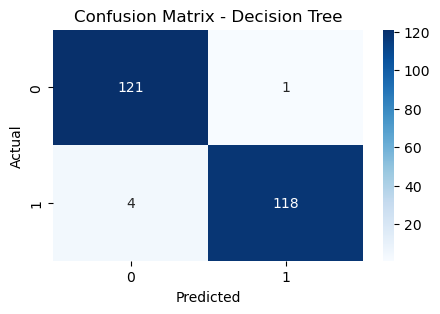

In [12]:
# Assuming clf is your trained DecisionTreeClassifier
y_pred = gs.predict(X_test)  # Use gs instead of clf if you want to use the grid search optimized model

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


## CT feature info

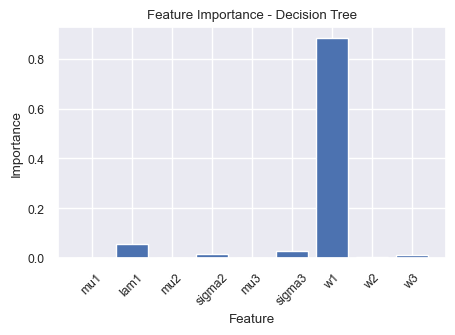

In [128]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming X_train is your feature matrix and y_train is your target
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(5, 3))
plt.bar(X.columns, tree.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.xticks(rotation=45)
plt.show()


# Random Forest

In [14]:
params = {'n_estimators':np.linspace(10,150,dtype='int',num=10),'max_depth':np.linspace(2,5,dtype='int'),'criterion':['gini','entropy']}

clf = RandomForestClassifier(n_jobs=-1,random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,verbose=10,n_jobs=-1)

gs=gs.fit(X_train,y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits
[CV 3/4; 1/1000] START criterion=gini, max_depth=2, n_estimators=10.............
[CV 3/4; 1/1000] END criterion=gini, max_depth=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 2/4; 2/1000] START criterion=gini, max_depth=2, n_estimators=25.............
[CV 2/4; 2/1000] END criterion=gini, max_depth=2, n_estimators=25;, score=0.998 total time=   0.2s
[CV 3/4; 4/1000] START criterion=gini, max_depth=2, n_estimators=56.............
[CV 3/4; 4/1000] END criterion=gini, max_depth=2, n_estimators=56;, score=0.999 total time=   0.3s
[CV 4/4; 4/1000] START criterion=gini, max_depth=2, n_estimators=56.............
[CV 4/4; 4/1000] END criterion=gini, max_depth=2, n_estimators=56;, score=0.998 total time=   0.3s
[CV 3/4; 6/1000] START criterion=gini, max_depth=2, n_estimators=87.............
[CV 3/4; 6/1000] END criterion=gini, max_depth=2, n_estimators=87;, score=0.999 total time=   0.4s
[CV 4/4; 6/1000] START criterion=gi

[CV 1/4; 1/1000] START criterion=gini, max_depth=2, n_estimators=10.............
[CV 1/4; 1/1000] END criterion=gini, max_depth=2, n_estimators=10;, score=0.991 total time=   0.1s
[CV 1/4; 2/1000] START criterion=gini, max_depth=2, n_estimators=25.............
[CV 1/4; 2/1000] END criterion=gini, max_depth=2, n_estimators=25;, score=0.997 total time=   0.2s
[CV 1/4; 3/1000] START criterion=gini, max_depth=2, n_estimators=41.............
[CV 1/4; 3/1000] END criterion=gini, max_depth=2, n_estimators=41;, score=0.997 total time=   0.3s
[CV 2/4; 3/1000] START criterion=gini, max_depth=2, n_estimators=41.............
[CV 2/4; 3/1000] END criterion=gini, max_depth=2, n_estimators=41;, score=0.999 total time=   0.2s
[CV 1/4; 5/1000] START criterion=gini, max_depth=2, n_estimators=72.............
[CV 1/4; 5/1000] END criterion=gini, max_depth=2, n_estimators=72;, score=0.997 total time=   0.4s
[CV 2/4; 5/1000] START criterion=gini, max_depth=2, n_estimators=72.............
[CV 2/4; 5/1000] EN

[CV 1/4; 18/1000] END criterion=gini, max_depth=2, n_estimators=118;, score=0.997 total time=   0.8s
[CV 3/4; 19/1000] START criterion=gini, max_depth=2, n_estimators=134...........
[CV 3/4; 19/1000] END criterion=gini, max_depth=2, n_estimators=134;, score=0.999 total time=   1.0s
[CV 3/4; 20/1000] START criterion=gini, max_depth=2, n_estimators=150...........
[CV 3/4; 20/1000] END criterion=gini, max_depth=2, n_estimators=150;, score=0.999 total time=   0.9s
[CV 3/4; 21/1000] START criterion=gini, max_depth=2, n_estimators=10............
[CV 3/4; 21/1000] END criterion=gini, max_depth=2, n_estimators=10;, score=0.999 total time=   0.1s
[CV 1/4; 22/1000] START criterion=gini, max_depth=2, n_estimators=25............
[CV 1/4; 22/1000] END criterion=gini, max_depth=2, n_estimators=25;, score=0.997 total time=   0.2s
[CV 4/4; 22/1000] START criterion=gini, max_depth=2, n_estimators=25............
[CV 4/4; 22/1000] END criterion=gini, max_depth=2, n_estimators=25;, score=0.998 total time=

[CV 3/4; 87/1000] START criterion=gini, max_depth=2, n_estimators=103...........
[CV 3/4; 87/1000] END criterion=gini, max_depth=2, n_estimators=103;, score=0.999 total time=   0.5s
[CV 3/4; 88/1000] START criterion=gini, max_depth=2, n_estimators=118...........
[CV 3/4; 88/1000] END criterion=gini, max_depth=2, n_estimators=118;, score=0.999 total time=   0.6s
[CV 3/4; 89/1000] START criterion=gini, max_depth=2, n_estimators=134...........
[CV 3/4; 89/1000] END criterion=gini, max_depth=2, n_estimators=134;, score=0.999 total time=   0.7s
[CV 2/4; 90/1000] START criterion=gini, max_depth=2, n_estimators=150...........
[CV 2/4; 90/1000] END criterion=gini, max_depth=2, n_estimators=150;, score=0.998 total time=   0.9s
[CV 2/4; 91/1000] START criterion=gini, max_depth=2, n_estimators=10............
[CV 2/4; 91/1000] END criterion=gini, max_depth=2, n_estimators=10;, score=0.998 total time=   0.1s
[CV 1/4; 92/1000] START criterion=gini, max_depth=2, n_estimators=25............
[CV 1/4; 9

[CV 2/4; 171/1000] END criterion=gini, max_depth=3, n_estimators=10;, score=0.997 total time=   0.1s
[CV 1/4; 172/1000] START criterion=gini, max_depth=3, n_estimators=25...........
[CV 1/4; 172/1000] END criterion=gini, max_depth=3, n_estimators=25;, score=0.998 total time=   0.3s
[CV 1/4; 173/1000] START criterion=gini, max_depth=3, n_estimators=41...........
[CV 1/4; 173/1000] END criterion=gini, max_depth=3, n_estimators=41;, score=0.998 total time=   0.5s
[CV 1/4; 174/1000] START criterion=gini, max_depth=3, n_estimators=56...........
[CV 1/4; 174/1000] END criterion=gini, max_depth=3, n_estimators=56;, score=0.998 total time=   0.6s
[CV 1/4; 175/1000] START criterion=gini, max_depth=3, n_estimators=72...........
[CV 1/4; 175/1000] END criterion=gini, max_depth=3, n_estimators=72;, score=0.998 total time=   0.7s
[CV 1/4; 176/1000] START criterion=gini, max_depth=3, n_estimators=87...........
[CV 1/4; 176/1000] END criterion=gini, max_depth=3, n_estimators=87;, score=0.998 total ti

[CV 4/4; 186/1000] START criterion=gini, max_depth=3, n_estimators=87...........
[CV 4/4; 186/1000] END criterion=gini, max_depth=3, n_estimators=87;, score=0.997 total time=   0.5s
[CV 4/4; 187/1000] START criterion=gini, max_depth=3, n_estimators=103..........
[CV 4/4; 187/1000] END criterion=gini, max_depth=3, n_estimators=103;, score=0.997 total time=   0.6s
[CV 4/4; 188/1000] START criterion=gini, max_depth=3, n_estimators=118..........
[CV 4/4; 188/1000] END criterion=gini, max_depth=3, n_estimators=118;, score=0.997 total time=   0.6s
[CV 4/4; 189/1000] START criterion=gini, max_depth=3, n_estimators=134..........
[CV 4/4; 189/1000] END criterion=gini, max_depth=3, n_estimators=134;, score=0.997 total time=   0.8s
[CV 4/4; 190/1000] START criterion=gini, max_depth=3, n_estimators=150..........
[CV 4/4; 190/1000] END criterion=gini, max_depth=3, n_estimators=150;, score=0.996 total time=   0.9s
[CV 4/4; 192/1000] START criterion=gini, max_depth=3, n_estimators=25...........
[CV 4

[CV 2/4; 179/1000] START criterion=gini, max_depth=3, n_estimators=134..........
[CV 2/4; 179/1000] END criterion=gini, max_depth=3, n_estimators=134;, score=0.999 total time=   0.6s
[CV 1/4; 180/1000] START criterion=gini, max_depth=3, n_estimators=150..........
[CV 1/4; 180/1000] END criterion=gini, max_depth=3, n_estimators=150;, score=0.998 total time=   0.8s
[CV 1/4; 181/1000] START criterion=gini, max_depth=3, n_estimators=10...........
[CV 1/4; 181/1000] END criterion=gini, max_depth=3, n_estimators=10;, score=0.995 total time=   0.1s
[CV 4/4; 181/1000] START criterion=gini, max_depth=3, n_estimators=10...........
[CV 4/4; 181/1000] END criterion=gini, max_depth=3, n_estimators=10;, score=0.998 total time=   0.1s
[CV 3/4; 182/1000] START criterion=gini, max_depth=3, n_estimators=25...........
[CV 3/4; 182/1000] END criterion=gini, max_depth=3, n_estimators=25;, score=0.999 total time=   0.2s
[CV 2/4; 183/1000] START criterion=gini, max_depth=3, n_estimators=41...........
[CV 2/4

[CV 3/4; 183/1000] START criterion=gini, max_depth=3, n_estimators=41...........
[CV 3/4; 183/1000] END criterion=gini, max_depth=3, n_estimators=41;, score=0.999 total time=   0.2s
[CV 2/4; 184/1000] START criterion=gini, max_depth=3, n_estimators=56...........
[CV 2/4; 184/1000] END criterion=gini, max_depth=3, n_estimators=56;, score=0.998 total time=   0.4s
[CV 3/4; 185/1000] START criterion=gini, max_depth=3, n_estimators=72...........
[CV 3/4; 185/1000] END criterion=gini, max_depth=3, n_estimators=72;, score=0.999 total time=   0.4s
[CV 1/4; 186/1000] START criterion=gini, max_depth=3, n_estimators=87...........
[CV 1/4; 186/1000] END criterion=gini, max_depth=3, n_estimators=87;, score=0.998 total time=   0.5s
[CV 2/4; 187/1000] START criterion=gini, max_depth=3, n_estimators=103..........
[CV 2/4; 187/1000] END criterion=gini, max_depth=3, n_estimators=103;, score=0.998 total time=   0.6s
[CV 2/4; 188/1000] START criterion=gini, max_depth=3, n_estimators=118..........
[CV 2/4;

[CV 3/4; 260/1000] END criterion=gini, max_depth=3, n_estimators=150;, score=1.000 total time=   1.4s
[CV 3/4; 262/1000] START criterion=gini, max_depth=3, n_estimators=25...........
[CV 3/4; 262/1000] END criterion=gini, max_depth=3, n_estimators=25;, score=0.999 total time=   0.2s
[CV 4/4; 262/1000] START criterion=gini, max_depth=3, n_estimators=25...........
[CV 4/4; 262/1000] END criterion=gini, max_depth=3, n_estimators=25;, score=0.998 total time=   0.2s
[CV 3/4; 263/1000] START criterion=gini, max_depth=3, n_estimators=41...........
[CV 3/4; 263/1000] END criterion=gini, max_depth=3, n_estimators=41;, score=0.999 total time=   0.4s
[CV 2/4; 264/1000] START criterion=gini, max_depth=3, n_estimators=56...........
[CV 2/4; 264/1000] END criterion=gini, max_depth=3, n_estimators=56;, score=0.998 total time=   0.6s
[CV 2/4; 265/1000] START criterion=gini, max_depth=3, n_estimators=72...........
[CV 2/4; 265/1000] END criterion=gini, max_depth=3, n_estimators=72;, score=0.999 total t

[CV 4/4; 274/1000] START criterion=gini, max_depth=3, n_estimators=56...........
[CV 4/4; 274/1000] END criterion=gini, max_depth=3, n_estimators=56;, score=0.997 total time=   0.5s
[CV 4/4; 275/1000] START criterion=gini, max_depth=3, n_estimators=72...........
[CV 4/4; 275/1000] END criterion=gini, max_depth=3, n_estimators=72;, score=0.997 total time=   0.5s
[CV 3/4; 276/1000] START criterion=gini, max_depth=3, n_estimators=87...........
[CV 3/4; 276/1000] END criterion=gini, max_depth=3, n_estimators=87;, score=0.999 total time=   0.5s
[CV 4/4; 277/1000] START criterion=gini, max_depth=3, n_estimators=103..........
[CV 4/4; 277/1000] END criterion=gini, max_depth=3, n_estimators=103;, score=0.997 total time=   0.7s
[CV 4/4; 278/1000] START criterion=gini, max_depth=3, n_estimators=118..........
[CV 4/4; 278/1000] END criterion=gini, max_depth=3, n_estimators=118;, score=0.997 total time=   0.6s
[CV 3/4; 279/1000] START criterion=gini, max_depth=3, n_estimators=134..........
[CV 3/4

[CV 3/4; 364/1000] START criterion=gini, max_depth=4, n_estimators=56...........
[CV 3/4; 364/1000] END criterion=gini, max_depth=4, n_estimators=56;, score=1.000 total time=   0.4s
[CV 4/4; 365/1000] START criterion=gini, max_depth=4, n_estimators=72...........
[CV 4/4; 365/1000] END criterion=gini, max_depth=4, n_estimators=72;, score=0.994 total time=   0.4s
[CV 3/4; 366/1000] START criterion=gini, max_depth=4, n_estimators=87...........
[CV 3/4; 366/1000] END criterion=gini, max_depth=4, n_estimators=87;, score=1.000 total time=   0.6s
[CV 3/4; 367/1000] START criterion=gini, max_depth=4, n_estimators=103..........
[CV 3/4; 367/1000] END criterion=gini, max_depth=4, n_estimators=103;, score=1.000 total time=   0.6s
[CV 3/4; 368/1000] START criterion=gini, max_depth=4, n_estimators=118..........
[CV 3/4; 368/1000] END criterion=gini, max_depth=4, n_estimators=118;, score=1.000 total time=   0.6s
[CV 2/4; 369/1000] START criterion=gini, max_depth=4, n_estimators=134..........
[CV 2/4

[CV 4/4; 364/1000] START criterion=gini, max_depth=4, n_estimators=56...........
[CV 4/4; 364/1000] END criterion=gini, max_depth=4, n_estimators=56;, score=0.994 total time=   0.3s
[CV 3/4; 365/1000] START criterion=gini, max_depth=4, n_estimators=72...........
[CV 3/4; 365/1000] END criterion=gini, max_depth=4, n_estimators=72;, score=1.000 total time=   0.6s
[CV 4/4; 366/1000] START criterion=gini, max_depth=4, n_estimators=87...........
[CV 4/4; 366/1000] END criterion=gini, max_depth=4, n_estimators=87;, score=0.996 total time=   0.6s
[CV 4/4; 367/1000] START criterion=gini, max_depth=4, n_estimators=103..........
[CV 4/4; 367/1000] END criterion=gini, max_depth=4, n_estimators=103;, score=0.996 total time=   0.5s
[CV 4/4; 368/1000] START criterion=gini, max_depth=4, n_estimators=118..........
[CV 4/4; 368/1000] END criterion=gini, max_depth=4, n_estimators=118;, score=0.996 total time=   0.6s
[CV 3/4; 369/1000] START criterion=gini, max_depth=4, n_estimators=134..........
[CV 3/4

[CV 2/4; 444/1000] END criterion=gini, max_depth=4, n_estimators=56;, score=0.999 total time=   0.3s
[CV 1/4; 445/1000] START criterion=gini, max_depth=4, n_estimators=72...........
[CV 1/4; 445/1000] END criterion=gini, max_depth=4, n_estimators=72;, score=0.998 total time=   0.4s
[CV 1/4; 446/1000] START criterion=gini, max_depth=4, n_estimators=87...........
[CV 1/4; 446/1000] END criterion=gini, max_depth=4, n_estimators=87;, score=0.998 total time=   0.5s
[CV 3/4; 447/1000] START criterion=gini, max_depth=4, n_estimators=103..........
[CV 3/4; 447/1000] END criterion=gini, max_depth=4, n_estimators=103;, score=1.000 total time=   0.5s
[CV 2/4; 448/1000] START criterion=gini, max_depth=4, n_estimators=118..........
[CV 2/4; 448/1000] END criterion=gini, max_depth=4, n_estimators=118;, score=0.999 total time=   0.6s
[CV 1/4; 449/1000] START criterion=gini, max_depth=4, n_estimators=134..........
[CV 1/4; 449/1000] END criterion=gini, max_depth=4, n_estimators=134;, score=0.998 total

[CV 1/4; 447/1000] START criterion=gini, max_depth=4, n_estimators=103..........
[CV 1/4; 447/1000] END criterion=gini, max_depth=4, n_estimators=103;, score=0.998 total time=   0.6s
[CV 1/4; 448/1000] START criterion=gini, max_depth=4, n_estimators=118..........
[CV 1/4; 448/1000] END criterion=gini, max_depth=4, n_estimators=118;, score=0.997 total time=   0.6s
[CV 2/4; 449/1000] START criterion=gini, max_depth=4, n_estimators=134..........
[CV 2/4; 449/1000] END criterion=gini, max_depth=4, n_estimators=134;, score=0.999 total time=   0.6s
[CV 2/4; 450/1000] START criterion=gini, max_depth=4, n_estimators=150..........
[CV 2/4; 450/1000] END criterion=gini, max_depth=4, n_estimators=150;, score=0.999 total time=   0.9s
[CV 2/4; 451/1000] START criterion=gini, max_depth=4, n_estimators=10...........
[CV 2/4; 451/1000] END criterion=gini, max_depth=4, n_estimators=10;, score=0.999 total time=   0.1s
[CV 4/4; 451/1000] START criterion=gini, max_depth=4, n_estimators=10...........
[CV 4

[CV 1/4; 441/1000] START criterion=gini, max_depth=4, n_estimators=10...........
[CV 1/4; 441/1000] END criterion=gini, max_depth=4, n_estimators=10;, score=0.991 total time=   0.1s
[CV 3/4; 441/1000] START criterion=gini, max_depth=4, n_estimators=10...........
[CV 3/4; 441/1000] END criterion=gini, max_depth=4, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/4; 442/1000] START criterion=gini, max_depth=4, n_estimators=25...........
[CV 3/4; 442/1000] END criterion=gini, max_depth=4, n_estimators=25;, score=1.000 total time=   0.2s
[CV 3/4; 443/1000] START criterion=gini, max_depth=4, n_estimators=41...........
[CV 3/4; 443/1000] END criterion=gini, max_depth=4, n_estimators=41;, score=1.000 total time=   0.2s
[CV 4/4; 444/1000] START criterion=gini, max_depth=4, n_estimators=56...........
[CV 4/4; 444/1000] END criterion=gini, max_depth=4, n_estimators=56;, score=0.994 total time=   0.6s
[CV 4/4; 445/1000] START criterion=gini, max_depth=4, n_estimators=72...........
[CV 4/4; 

[CV 2/4; 459/1000] START criterion=gini, max_depth=4, n_estimators=134..........
[CV 2/4; 459/1000] END criterion=gini, max_depth=4, n_estimators=134;, score=0.999 total time=   0.8s
[CV 3/4; 460/1000] START criterion=gini, max_depth=4, n_estimators=150..........
[CV 3/4; 460/1000] END criterion=gini, max_depth=4, n_estimators=150;, score=1.000 total time=   0.8s
[CV 2/4; 461/1000] START criterion=gini, max_depth=4, n_estimators=10...........
[CV 2/4; 461/1000] END criterion=gini, max_depth=4, n_estimators=10;, score=0.999 total time=   0.1s
[CV 2/4; 462/1000] START criterion=gini, max_depth=4, n_estimators=25...........
[CV 2/4; 462/1000] END criterion=gini, max_depth=4, n_estimators=25;, score=0.999 total time=   0.2s
[CV 3/4; 463/1000] START criterion=gini, max_depth=4, n_estimators=41...........
[CV 3/4; 463/1000] END criterion=gini, max_depth=4, n_estimators=41;, score=1.000 total time=   0.2s
[CV 3/4; 464/1000] START criterion=gini, max_depth=4, n_estimators=56...........
[CV 3/4

[CV 3/4; 530/1000] START criterion=entropy, max_depth=2, n_estimators=150.......
[CV 3/4; 530/1000] END criterion=entropy, max_depth=2, n_estimators=150;, score=0.999 total time=   0.7s
[CV 3/4; 531/1000] START criterion=entropy, max_depth=2, n_estimators=10........
[CV 3/4; 531/1000] END criterion=entropy, max_depth=2, n_estimators=10;, score=0.998 total time=   0.1s
[CV 2/4; 532/1000] START criterion=entropy, max_depth=2, n_estimators=25........
[CV 2/4; 532/1000] END criterion=entropy, max_depth=2, n_estimators=25;, score=0.999 total time=   0.2s
[CV 2/4; 533/1000] START criterion=entropy, max_depth=2, n_estimators=41........
[CV 2/4; 533/1000] END criterion=entropy, max_depth=2, n_estimators=41;, score=0.998 total time=   0.2s
[CV 2/4; 534/1000] START criterion=entropy, max_depth=2, n_estimators=56........
[CV 2/4; 534/1000] END criterion=entropy, max_depth=2, n_estimators=56;, score=0.998 total time=   0.3s
[CV 3/4; 535/1000] START criterion=entropy, max_depth=2, n_estimators=72..

[CV 1/4; 617/1000] START criterion=entropy, max_depth=2, n_estimators=103.......
[CV 1/4; 617/1000] END criterion=entropy, max_depth=2, n_estimators=103;, score=0.997 total time=   0.5s
[CV 1/4; 618/1000] START criterion=entropy, max_depth=2, n_estimators=118.......
[CV 1/4; 618/1000] END criterion=entropy, max_depth=2, n_estimators=118;, score=0.997 total time=   0.6s
[CV 1/4; 619/1000] START criterion=entropy, max_depth=2, n_estimators=134.......
[CV 1/4; 619/1000] END criterion=entropy, max_depth=2, n_estimators=134;, score=0.997 total time=   0.7s
[CV 1/4; 620/1000] START criterion=entropy, max_depth=2, n_estimators=150.......
[CV 1/4; 620/1000] END criterion=entropy, max_depth=2, n_estimators=150;, score=0.997 total time=   0.8s
[CV 2/4; 621/1000] START criterion=entropy, max_depth=2, n_estimators=10........
[CV 2/4; 621/1000] END criterion=entropy, max_depth=2, n_estimators=10;, score=0.998 total time=   0.1s
[CV 1/4; 622/1000] START criterion=entropy, max_depth=2, n_estimators=2

[CV 4/4; 622/1000] END criterion=entropy, max_depth=2, n_estimators=25;, score=0.995 total time=   0.2s
[CV 3/4; 623/1000] START criterion=entropy, max_depth=2, n_estimators=41........
[CV 3/4; 623/1000] END criterion=entropy, max_depth=2, n_estimators=41;, score=0.999 total time=   0.3s
[CV 2/4; 624/1000] START criterion=entropy, max_depth=2, n_estimators=56........
[CV 2/4; 624/1000] END criterion=entropy, max_depth=2, n_estimators=56;, score=0.998 total time=   0.3s
[CV 3/4; 625/1000] START criterion=entropy, max_depth=2, n_estimators=72........
[CV 3/4; 625/1000] END criterion=entropy, max_depth=2, n_estimators=72;, score=0.999 total time=   0.4s
[CV 4/4; 626/1000] START criterion=entropy, max_depth=2, n_estimators=87........
[CV 4/4; 626/1000] END criterion=entropy, max_depth=2, n_estimators=87;, score=0.998 total time=   0.4s
[CV 2/4; 627/1000] START criterion=entropy, max_depth=2, n_estimators=103.......
[CV 2/4; 627/1000] END criterion=entropy, max_depth=2, n_estimators=103;, s

[CV 2/4; 625/1000] END criterion=entropy, max_depth=2, n_estimators=72;, score=0.998 total time=   0.4s
[CV 2/4; 626/1000] START criterion=entropy, max_depth=2, n_estimators=87........
[CV 2/4; 626/1000] END criterion=entropy, max_depth=2, n_estimators=87;, score=0.998 total time=   0.4s
[CV 4/4; 627/1000] START criterion=entropy, max_depth=2, n_estimators=103.......
[CV 4/4; 627/1000] END criterion=entropy, max_depth=2, n_estimators=103;, score=0.997 total time=   0.5s
[CV 4/4; 628/1000] START criterion=entropy, max_depth=2, n_estimators=118.......
[CV 4/4; 628/1000] END criterion=entropy, max_depth=2, n_estimators=118;, score=0.997 total time=   0.6s
[CV 4/4; 629/1000] START criterion=entropy, max_depth=2, n_estimators=134.......
[CV 4/4; 629/1000] END criterion=entropy, max_depth=2, n_estimators=134;, score=0.997 total time=   0.6s
[CV 4/4; 630/1000] START criterion=entropy, max_depth=2, n_estimators=150.......
[CV 4/4; 630/1000] END criterion=entropy, max_depth=2, n_estimators=150;

[CV 2/4; 630/1000] END criterion=entropy, max_depth=2, n_estimators=150;, score=0.998 total time=   0.7s
[CV 4/4; 631/1000] START criterion=entropy, max_depth=2, n_estimators=10........
[CV 4/4; 631/1000] END criterion=entropy, max_depth=2, n_estimators=10;, score=0.997 total time=   0.1s
[CV 4/4; 632/1000] START criterion=entropy, max_depth=2, n_estimators=25........
[CV 4/4; 632/1000] END criterion=entropy, max_depth=2, n_estimators=25;, score=0.995 total time=   0.1s
[CV 2/4; 633/1000] START criterion=entropy, max_depth=2, n_estimators=41........
[CV 2/4; 633/1000] END criterion=entropy, max_depth=2, n_estimators=41;, score=0.998 total time=   0.2s
[CV 4/4; 634/1000] START criterion=entropy, max_depth=2, n_estimators=56........
[CV 4/4; 634/1000] END criterion=entropy, max_depth=2, n_estimators=56;, score=0.998 total time=   0.3s
[CV 4/4; 635/1000] START criterion=entropy, max_depth=2, n_estimators=72........
[CV 4/4; 635/1000] END criterion=entropy, max_depth=2, n_estimators=72;, s

[CV 4/4; 704/1000] START criterion=entropy, max_depth=3, n_estimators=56........
[CV 4/4; 704/1000] END criterion=entropy, max_depth=3, n_estimators=56;, score=0.997 total time=   0.6s
[CV 4/4; 705/1000] START criterion=entropy, max_depth=3, n_estimators=72........
[CV 4/4; 705/1000] END criterion=entropy, max_depth=3, n_estimators=72;, score=0.997 total time=   0.8s
[CV 4/4; 706/1000] START criterion=entropy, max_depth=3, n_estimators=87........
[CV 4/4; 706/1000] END criterion=entropy, max_depth=3, n_estimators=87;, score=0.997 total time=   0.6s
[CV 2/4; 707/1000] START criterion=entropy, max_depth=3, n_estimators=103.......
[CV 2/4; 707/1000] END criterion=entropy, max_depth=3, n_estimators=103;, score=0.998 total time=   0.9s
[CV 2/4; 708/1000] START criterion=entropy, max_depth=3, n_estimators=118.......
[CV 2/4; 708/1000] END criterion=entropy, max_depth=3, n_estimators=118;, score=0.999 total time=   1.0s
[CV 3/4; 709/1000] START criterion=entropy, max_depth=3, n_estimators=134

[CV 2/4; 706/1000] END criterion=entropy, max_depth=3, n_estimators=87;, score=0.998 total time=   0.9s
[CV 3/4; 707/1000] START criterion=entropy, max_depth=3, n_estimators=103.......
[CV 3/4; 707/1000] END criterion=entropy, max_depth=3, n_estimators=103;, score=0.999 total time=   0.9s
[CV 3/4; 708/1000] START criterion=entropy, max_depth=3, n_estimators=118.......
[CV 3/4; 708/1000] END criterion=entropy, max_depth=3, n_estimators=118;, score=0.999 total time=   1.0s
[CV 2/4; 709/1000] START criterion=entropy, max_depth=3, n_estimators=134.......
[CV 2/4; 709/1000] END criterion=entropy, max_depth=3, n_estimators=134;, score=0.999 total time=   0.9s
[CV 3/4; 710/1000] START criterion=entropy, max_depth=3, n_estimators=150.......
[CV 3/4; 710/1000] END criterion=entropy, max_depth=3, n_estimators=150;, score=0.999 total time=   0.9s
[CV 3/4; 712/1000] START criterion=entropy, max_depth=3, n_estimators=25........
[CV 3/4; 712/1000] END criterion=entropy, max_depth=3, n_estimators=25;

[CV 3/4; 714/1000] END criterion=entropy, max_depth=3, n_estimators=56;, score=0.999 total time=   0.3s
[CV 3/4; 715/1000] START criterion=entropy, max_depth=3, n_estimators=72........
[CV 3/4; 715/1000] END criterion=entropy, max_depth=3, n_estimators=72;, score=0.999 total time=   0.5s
[CV 4/4; 716/1000] START criterion=entropy, max_depth=3, n_estimators=87........
[CV 4/4; 716/1000] END criterion=entropy, max_depth=3, n_estimators=87;, score=0.997 total time=   0.4s
[CV 2/4; 717/1000] START criterion=entropy, max_depth=3, n_estimators=103.......
[CV 2/4; 717/1000] END criterion=entropy, max_depth=3, n_estimators=103;, score=0.998 total time=   0.6s
[CV 2/4; 718/1000] START criterion=entropy, max_depth=3, n_estimators=118.......
[CV 2/4; 718/1000] END criterion=entropy, max_depth=3, n_estimators=118;, score=0.999 total time=   0.6s
[CV 1/4; 719/1000] START criterion=entropy, max_depth=3, n_estimators=134.......
[CV 1/4; 719/1000] END criterion=entropy, max_depth=3, n_estimators=134;,

[CV 4/4; 785/1000] START criterion=entropy, max_depth=3, n_estimators=72........
[CV 4/4; 785/1000] END criterion=entropy, max_depth=3, n_estimators=72;, score=0.997 total time=   0.3s
[CV 4/4; 786/1000] START criterion=entropy, max_depth=3, n_estimators=87........
[CV 4/4; 786/1000] END criterion=entropy, max_depth=3, n_estimators=87;, score=0.997 total time=   0.4s
[CV 3/4; 787/1000] START criterion=entropy, max_depth=3, n_estimators=103.......
[CV 3/4; 787/1000] END criterion=entropy, max_depth=3, n_estimators=103;, score=0.999 total time=   0.5s
[CV 3/4; 788/1000] START criterion=entropy, max_depth=3, n_estimators=118.......
[CV 3/4; 788/1000] END criterion=entropy, max_depth=3, n_estimators=118;, score=0.999 total time=   0.6s
[CV 2/4; 789/1000] START criterion=entropy, max_depth=3, n_estimators=134.......
[CV 2/4; 789/1000] END criterion=entropy, max_depth=3, n_estimators=134;, score=0.999 total time=   0.6s
[CV 1/4; 790/1000] START criterion=entropy, max_depth=3, n_estimators=15

[CV 2/4; 805/1000] START criterion=entropy, max_depth=3, n_estimators=72........
[CV 2/4; 805/1000] END criterion=entropy, max_depth=3, n_estimators=72;, score=0.999 total time=   0.4s
[CV 2/4; 806/1000] START criterion=entropy, max_depth=3, n_estimators=87........
[CV 2/4; 806/1000] END criterion=entropy, max_depth=3, n_estimators=87;, score=0.998 total time=   0.4s
[CV 2/4; 807/1000] START criterion=entropy, max_depth=3, n_estimators=103.......
[CV 2/4; 807/1000] END criterion=entropy, max_depth=3, n_estimators=103;, score=0.998 total time=   0.5s
[CV 3/4; 808/1000] START criterion=entropy, max_depth=3, n_estimators=118.......
[CV 3/4; 808/1000] END criterion=entropy, max_depth=3, n_estimators=118;, score=0.999 total time=   0.6s
[CV 3/4; 809/1000] START criterion=entropy, max_depth=3, n_estimators=134.......
[CV 3/4; 809/1000] END criterion=entropy, max_depth=3, n_estimators=134;, score=0.999 total time=   0.7s
[CV 3/4; 810/1000] START criterion=entropy, max_depth=3, n_estimators=15

[CV 4/4; 854/1000] END criterion=entropy, max_depth=4, n_estimators=56;, score=0.998 total time=   0.3s
[CV 4/4; 855/1000] START criterion=entropy, max_depth=4, n_estimators=72........
[CV 4/4; 855/1000] END criterion=entropy, max_depth=4, n_estimators=72;, score=0.998 total time=   0.4s
[CV 4/4; 856/1000] START criterion=entropy, max_depth=4, n_estimators=87........
[CV 4/4; 856/1000] END criterion=entropy, max_depth=4, n_estimators=87;, score=0.998 total time=   0.7s
[CV 3/4; 857/1000] START criterion=entropy, max_depth=4, n_estimators=103.......
[CV 3/4; 857/1000] END criterion=entropy, max_depth=4, n_estimators=103;, score=1.000 total time=   0.7s
[CV 4/4; 858/1000] START criterion=entropy, max_depth=4, n_estimators=118.......
[CV 4/4; 858/1000] END criterion=entropy, max_depth=4, n_estimators=118;, score=0.998 total time=   0.7s
[CV 4/4; 859/1000] START criterion=entropy, max_depth=4, n_estimators=134.......
[CV 4/4; 859/1000] END criterion=entropy, max_depth=4, n_estimators=134;,

[CV 1/4; 869/1000] START criterion=entropy, max_depth=4, n_estimators=134.......
[CV 1/4; 869/1000] END criterion=entropy, max_depth=4, n_estimators=134;, score=0.998 total time=   0.7s
[CV 1/4; 870/1000] START criterion=entropy, max_depth=4, n_estimators=150.......
[CV 1/4; 870/1000] END criterion=entropy, max_depth=4, n_estimators=150;, score=0.998 total time=   0.9s
[CV 1/4; 871/1000] START criterion=entropy, max_depth=4, n_estimators=10........
[CV 1/4; 871/1000] END criterion=entropy, max_depth=4, n_estimators=10;, score=0.992 total time=   0.1s
[CV 3/4; 871/1000] START criterion=entropy, max_depth=4, n_estimators=10........
[CV 3/4; 871/1000] END criterion=entropy, max_depth=4, n_estimators=10;, score=0.999 total time=   0.1s
[CV 1/4; 872/1000] START criterion=entropy, max_depth=4, n_estimators=25........
[CV 1/4; 872/1000] END criterion=entropy, max_depth=4, n_estimators=25;, score=0.998 total time=   0.2s
[CV 1/4; 873/1000] START criterion=entropy, max_depth=4, n_estimators=41.

## RF metrics

In [15]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)

Best parameters set found : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 25} 

Classification report on Test set

Accuracy:  0.98
Recall:  0.97
Precision:  0.99
ROC AUC:  0.98


## RF matrix

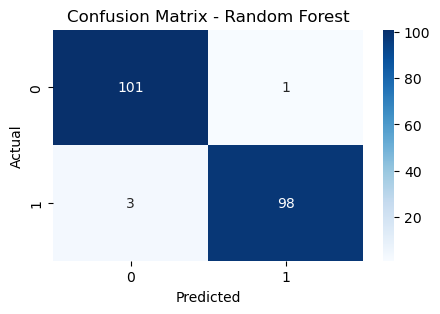

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # Importing plt module

# Assuming clf is your trained RandomForestClassifier
y_pred = gs.predict(X_test)  # Use gs instead of clf if you want to use the grid search optimized model

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


## RF feature info

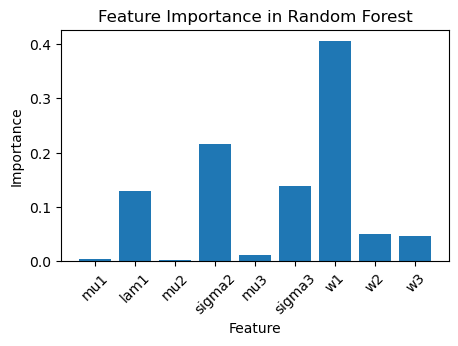

In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X_train is your feature matrix and y_train is your target
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

feature_importances = forest.feature_importances_
feature_names = X.columns  # Assuming X is your DataFrame without the target column

plt.figure(figsize=(5, 3))
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)
plt.show()


# Logistic Regression

In [13]:
params = {'C': np.logspace(-3, 3, 50), 'penalty': ['l1', 'l2']}

clf = LogisticRegression(solver='liblinear',random_state=12)

gs = GridSearchCV(clf, params, scoring='roc_auc',cv=cv,n_jobs=-1)

gs=gs.fit(X_train,y_train)

## LR metrics

In [14]:
print("Best parameters set found :",gs.best_params_,'\n')
print("Classification report on Test set\n")

y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred),3)
precision = round(precision_score(y_true, y_pred),3)
roc_auc = round(roc_auc_score(y_true, y_pred),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('ROC AUC: ',roc_auc)
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Best parameters set found : {'C': 138.9495494373136, 'penalty': 'l2'} 

Classification report on Test set

Accuracy:  0.98
Recall:  0.967
Precision:  0.992
ROC AUC:  0.98
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       122
         1.0       0.99      0.97      0.98       122

    accuracy                           0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



In [131]:
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_recall_curve, log_loss, matthews_corrcoef, fbeta_score

# Compute additional metrics
f1 = round(f1_score(y_true, y_pred), 3)
conf_matrix = confusion_matrix(y_true, y_pred)
fpr, tpr, _ = roc_curve(y_true, y_pred)
precision, recall, _ = precision_recall_curve(y_true, y_pred)
logloss = round(log_loss(y_true, y_pred), 3)
mcc = round(matthews_corrcoef(y_true, y_pred), 3)
f_beta = round(fbeta_score(y_true, y_pred, beta=1), 3)

# Print additional metrics
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)
print('ROC Curve - FPR:', fpr)
print('ROC Curve - TPR:', tpr)
print('Precision-Recall Curve - Precision:', precision)
print('Precision-Recall Curve - Recall:', recall)
print('Log Loss:', logloss)
print('Matthews Correlation Coefficient:', mcc)
print('F-beta Score:', f_beta)


F1 Score: 0.979
Confusion Matrix:
 [[122   0]
 [  5 116]]
ROC Curve - FPR: [0. 0. 1.]
ROC Curve - TPR: [0.         0.95867769 1.        ]
Precision-Recall Curve - Precision: [0.49794239 1.         1.        ]
Precision-Recall Curve - Recall: [1.         0.95867769 0.        ]
Log Loss: 0.742
Matthews Correlation Coefficient: 0.96
F-beta Score: 0.979


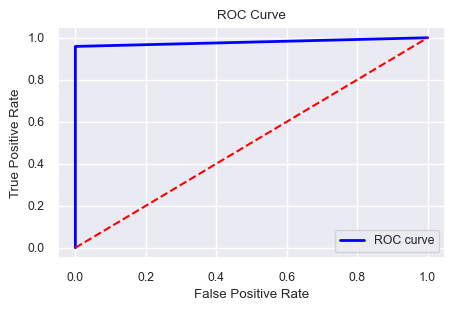

In [132]:
import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## LR matrix

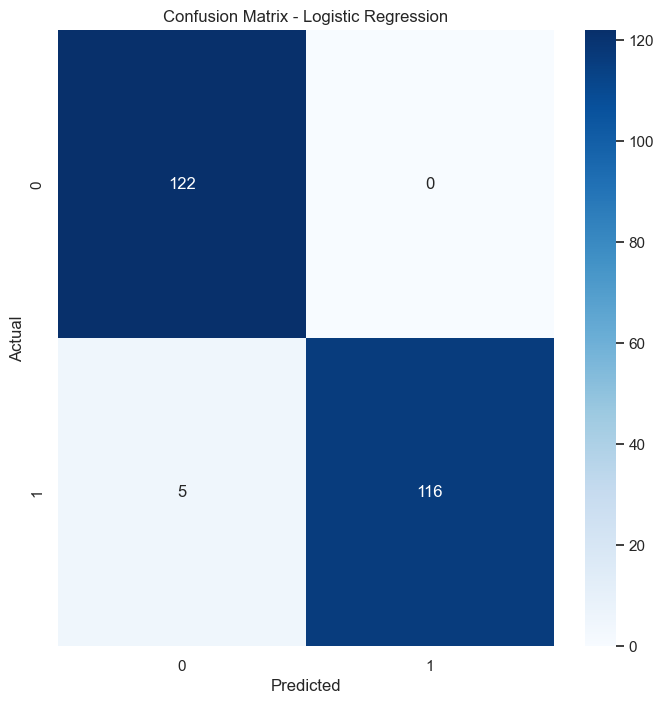

In [162]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # Importing plt module

# Assuming log_reg is your trained Logistic Regression model
y_pred = gs.predict(X_test)  # Use gs instead of log_reg if you want to use the grid search optimized model

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## LR feature info

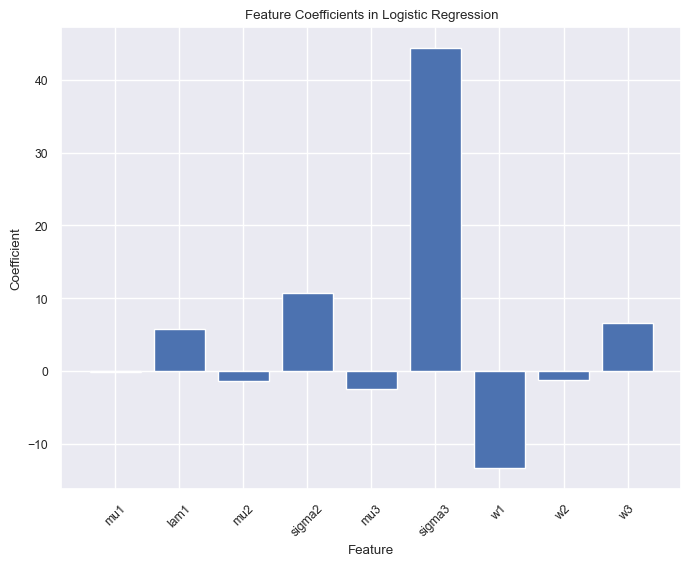

In [120]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming log_reg is your trained Logistic Regression model
coefficients = gs.best_estimator_.coef_[0]  # Use gs.best_estimator_ to get the best model from grid search
feature_names = X.columns  # Assuming X is your DataFrame without the target column

plt.figure(figsize=(8, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients in Logistic Regression')
plt.xticks(rotation=45)
plt.show()


# 4-Class 

In [15]:
#list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP thresh 3/*.txt")

# List to hold individual DataFrames
dfs = []

# Iterate through each file in the directory
for file in list_dir:
    # Read the file into a DataFrame
    #file_path = os.path.join(directory, filename)
    df = pd.read_csv(file) #, delimiter='\t')  # Assuming tab-separated values
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame as CSV
merged_df.to_csv("merged_data.csv", index=False)
dataset_after=merged_df

dataset_after = dataset_after.drop(['Unnamed: 0'],axis=1)
dataset_after

,mu1,lam1,mu2,sigma2,w1,w2,Target,Stimulation
0,0.029823,0.023443,4.576032e-02,0.026799,0.788097,0.211903,0.0,0.0
1,0.028452,0.022634,4.559451e-02,0.027922,0.768587,0.231413,0.0,0.0
2,0.028697,0.023824,4.582815e-02,0.030433,0.784083,0.215917,0.0,0.0
3,0.030750,0.023242,4.411370e-02,0.023057,0.815669,0.184331,0.0,0.0
4,0.030043,0.022533,4.501446e-02,0.021350,0.815744,0.184256,0.0,0.0
...,...,...,...,...,...,...,...,...
806,0.050615,0.026634,2.284368e-02,0.096962,0.543674,0.456326,0.0,0.0
807,0.057555,0.028156,5.238110e-02,0.069447,0.576031,0.423969,0.0,0.0
808,0.053258,0.031079,2.295551e-07,0.108189,0.445401,0.554599,0.0,0.0
809,0.048767,0.026282,4.420579e-04,0.111178,0.451920,0.548080,0.0,0.0


In [17]:
print('Target LRRK2 vs Healthy\n',dataset_after['Target'].value_counts())
print('Stimulated LRRK2 vs Healthy\n',dataset_after['Stimulation'].value_counts())

Target LRRK2 vs Healthy
 0.0    406
1.0    405
Name: Target, dtype: int64
Stimulated LRRK2 vs Healthy
 0.0    514
1.0    297
Name: Stimulation, dtype: int64


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
#dataset = pd.read_csv("dataset_after.csv")
dataset=dataset_after
# Combine "target" and "stimulation" columns to create a new categorical variable
#dataset['class'] = dataset['Target'].astype(int) + dataset['Stimulation'].astype(int)
dataset['class'] = np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 0), 0,
                   np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 1), 1,
                   np.where((dataset['Target'] == 1) & (dataset['Stimulation'] == 0), 2, 3)))


# Split the dataset into features (X) and target variable (y)
X = dataset.drop(["Stimulation", "Target", "class"], axis=1)
y = dataset["class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


In [19]:
dataset_after['class'].value_counts()

2    282
0    232
1    174
3    123
Name: class, dtype: int64

In [20]:
dataset_after['class'].value_counts(1)

2    0.347719
0    0.286067
1    0.214550
3    0.151665
Name: class, dtype: float64

# Classification Tree

In [21]:
print("Classification report on Test set\n")
gs = DecisionTreeClassifier(max_depth=7,random_state=12)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)

Classification report on Test set

Accuracy:  0.693
Recall:  0.693
Precision:  0.685


In [22]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        56
           1       0.74      0.76      0.75        37
           2       0.65      0.71      0.68        45
           3       0.40      0.32      0.36        25

    accuracy                           0.69       163
   macro avg       0.65      0.65      0.65       163
weighted avg       0.68      0.69      0.69       163



Text(67.24999999999999, 0.5, 'True')

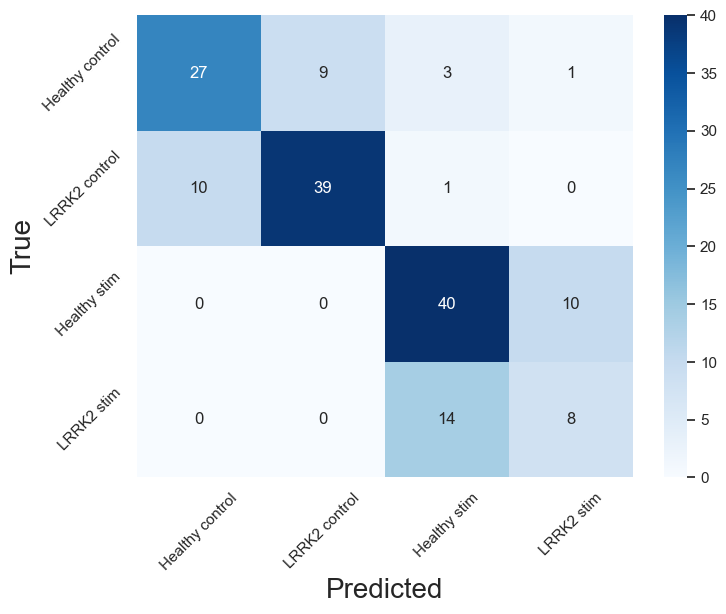

In [148]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)
#print('ROC AUC: ',roc_auc)
from sklearn import metrics
cm=metrics.confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (8,6))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

In [ ]:

import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression

In [23]:
print("Classification report on Test set\n")
gs = LogisticRegression(penalty='l2',C=0.5)#,random_state=12)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)



Classification report on Test set



/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67        56
           1       0.62      0.54      0.58        37
           2       0.62      0.98      0.76        45
           3       0.00      0.00      0.00        25

    accuracy                           0.63       163
   macro avg       0.47      0.55      0.50       163
weighted avg       0.54      0.63      0.57       163



Text(67.24999999999999, 0.5, 'True')

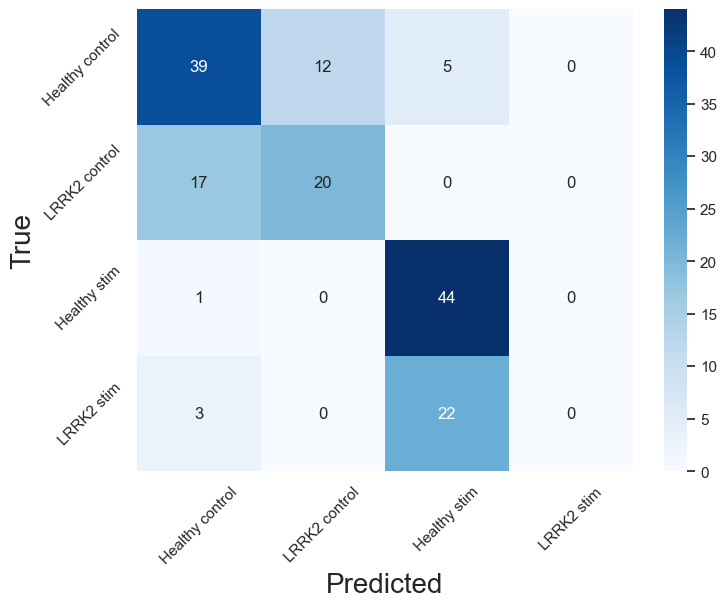

In [24]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)
#print('ROC AUC: ',roc_auc)
from sklearn import metrics
cm=metrics.confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (8,6))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

In [93]:
accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
#print('ROC AUC: ',roc_auc)


Accuracy:  0.698
Recall:  0.698
Precision:  0.597


/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

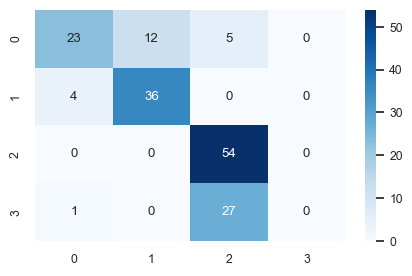

In [94]:
cm=metrics.confusion_matrix(y_true,y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (5,3))
sns.set(font_scale=0.8) # for label size
sns.heatmap(df_cm,annot=True,cmap="Blues")


In [95]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6975308641975309
              precision    recall  f1-score   support

           0       0.82      0.57      0.68        40
           1       0.75      0.90      0.82        40
           2       0.63      1.00      0.77        54
           3       0.00      0.00      0.00        28

    accuracy                           0.70       162
   macro avg       0.55      0.62      0.57       162
weighted avg       0.60      0.70      0.63       162



/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7318840579710145
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        33
           1       0.86      0.84      0.85        50
           2       0.58      0.93      0.71        27
           3       0.89      0.29      0.43        28

    accuracy                           0.73       138
   macro avg       0.76      0.71      0.68       138
weighted avg       0.77      0.73      0.71       138



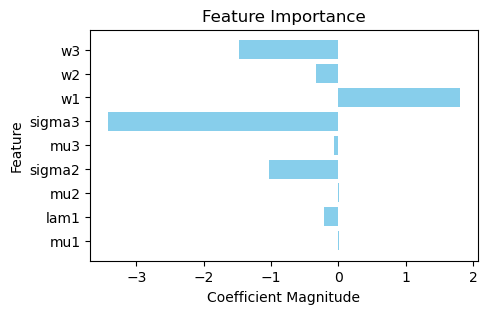

In [81]:
coefficients = model.coef_[0]

# Match coefficients with feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(5, 3))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Random Forest

In [52]:
from hyperopt.pyll import scope
from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import cross_val_score
#@scope.define
#def intero(a):
#     return int(a)

In [53]:
from hyperopt import hp

space = {}


#RF
space['n_estimators'] = hp.choice('n_estimators', np.arange(50, 300,1, dtype=int))
space['max_samples'] = hp.uniform('max_samples',0.4,1)
space['max_features'] = hp.uniform('max_features',0.4,1)
space['criterion'] = hp.choice('criterion',['gini','entropy'])
space['max_depth'] = scope.int(hp.quniform('max_depth',3,10,1))
space['ccp_alpha']=hp.uniform('ccp_alpha',0,0.001)
#space['bootstrap']=hp.choice('bootstrap',[False,True])
space['bootstrap'] = hp.choice('bootstrap', [True])
space['min_samples_leaf']=scope.int(hp.quniform('min_samples_leaf',1,5,1))
space['min_samples_split']=scope.int(hp.quniform('min_samples_split',2,10,1))

In [54]:
from sklearn.ensemble import RandomForestClassifier

def objective(params):
        ######################## hyper params ##############################

        params_RF = {}
        
        params_RF['n_estimators'] = params['n_estimators']
        params_RF['max_samples'] = params['max_samples']
        params_RF['max_features'] = params['max_features']
        params_RF['criterion'] = params['criterion']
        params_RF['max_depth'] = params['max_depth']
        params_RF['ccp_alpha'] = params['ccp_alpha']
        params_RF['bootstrap'] = params['bootstrap']
        params_RF['min_samples_leaf'] = params['min_samples_leaf']
        params_RF['min_samples_split'] = params['min_samples_split']
        

        ########################## Classifier definition ###################

        classifier = RandomForestClassifier(n_jobs=-1)
        classifier.set_params(**params_RF)

        
        ######################### Model testing ################################

        shuffle = StratifiedKFold(n_splits=4, shuffle=True, random_state=12)
        
        

        score = cross_val_score(classifier, X_train, y_train, cv=shuffle, scoring='accuracy', n_jobs=-1)
        score = np.mean(score)
        
        

        return 1 - score

    ######################## Start optim ####################################



# The Trials object will store details of each iteration
trials = Trials()

    # Run the hyperparameter search using the tpe algorithm
best = fmin(objective,
                space,
                algo=tpe.suggest,
                max_evals=500,
                trials=trials)

100%|█████████████████████| 500/500 [11:21<00:00,  1.36s/trial, best loss: 0.25]


In [55]:
cat = {}
cat['n_estimators'] = np.arange(50, 150, dtype=int)
cat['bootstrap'] = [False,True]
cat['criterion'] = ['gini','entropy']
best_models = performance_visualizer(trials, 300, choice=True, **cat)

In [56]:
best_dict = best_models.to_dict(orient='records')[-1]

In [57]:
best_dict.pop('performance')

0.75

In [58]:
best_dict['min_samples_leaf']=int(best_dict['min_samples_leaf'])
best_dict['min_samples_split']=int(best_dict['min_samples_split'])
best_dict['max_depth']=int(best_dict['max_depth'])
best_dict['bootstrap']=True

Classification report on Test set

Accuracy:  0.716
Recall:  0.716
Precision:  0.701


Text(29.749999999999993, 0.5, 'True Label')

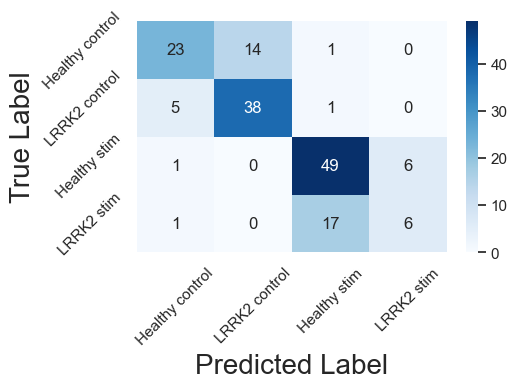

In [59]:
print("Classification report on Test set\n")
gs = RandomForestClassifier()
gs.set_params(**best_dict)
gs.fit(X_train,y_train)
y_true, y_pred = y_test, gs.predict(X_test)

accuracy = round(accuracy_score(y_true, y_pred),3)
recall = round(recall_score(y_true, y_pred,average = 'weighted'),3)
precision = round(precision_score(y_true, y_pred,average = 'weighted'),3)
#roc_auc = round(roc_auc_score(y_true, y_pred,multi_class = 'ovr'),3)

print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
#print('ROC AUC: ',roc_auc)
cm=metrics.confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,3))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap='Blues')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted Label',fontdict={'size':20})
plt.ylabel('True Label',fontdict={'size':20})

mu1
Healthy
Control:  0.013811112841217736
Stimulation:  0.04282156812964216
LRRK2
Control:  0.22087853674579472
Stimulation:  0.144709648801504



lam1
Healthy
Control:  1.2467484625850464e-05
Stimulation:  0.0003252605012341352
LRRK2
Control:  0.08433555339985027
Stimulation:  0.039717629342686106



mu2
Healthy
Control:  0.3044408873432026
Stimulation:  0.39822187750044513
LRRK2
Control:  0.28651762451020857
Stimulation:  0.20419534158912267



sigma2
Healthy
Control:  0.00013173380855596
Stimulation:  0.001660302068740765
LRRK2
Control:  1.2347930815040378e-06
Stimulation:  3.843598270274097e-06



mu3
Healthy
Control:  0.0035682518340650407
Stimulation:  0.016531496969437995
LRRK2
Control:  0.2833890486642542
Stimulation:  0.20139510014098394



sigma3
Healthy
Control:  0.6688255023544767
Stimulation:  0.7249196951112677
LRRK2
Control:  1.128580517245954e-05
Stimulation:  2.988847835391908e-06



w1
Healthy
Control:  1.8483340644462513e-10
Stimulation:  1.5796466206657472e-07
LRRK

/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/var/folders/d6/n7zzsskd0jv11v_qxbdvkkf40000gn/T/ipykernel_94830/77030850.py:42: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, t = stats.ttest_ind(y_list_param_boxplot[:len1], y_list_param_boxplot[len1:len1+len2])
/var/folders/d6/n7zzsskd0jv11v_qxbdvkkf40000gn/T/ipykernel_94830/77030850.py:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellati

Control:  3.8257676198160716e-44
Stimulation:  5.051294990552321e-35
LRRK2
Control:  2.77630150810389e-25
Stimulation:  5.290480629918378e-31



class
Healthy
Control:  3.8257676198160716e-44
Stimulation:  5.051294990552321e-35
LRRK2
Control:  2.77630150810389e-25
Stimulation:  5.290480629918378e-31





/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/var/folders/d6/n7zzsskd0jv11v_qxbdvkkf40000gn/T/ipykernel_94830/77030850.py:42: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, t = stats.ttest_ind(y_list_param_boxplot[:len1], y_list_param_boxplot[len1:len1+len2])
/var/folders/d6/n7zzsskd0jv11v_qxbdvkkf40000gn/T/ipykernel_94830/77030850.py:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, t = stats.ttest_ind(y_list_param_boxplot[:len1], y_list_param_boxplot[len1+len2:])


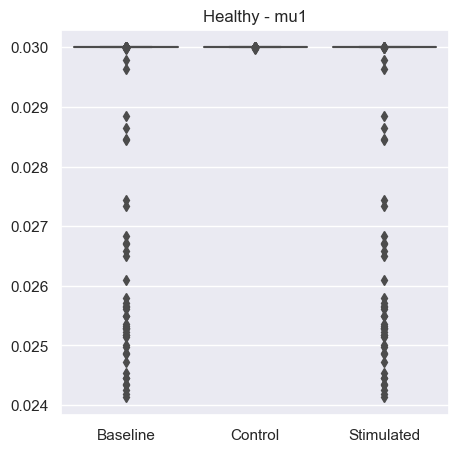

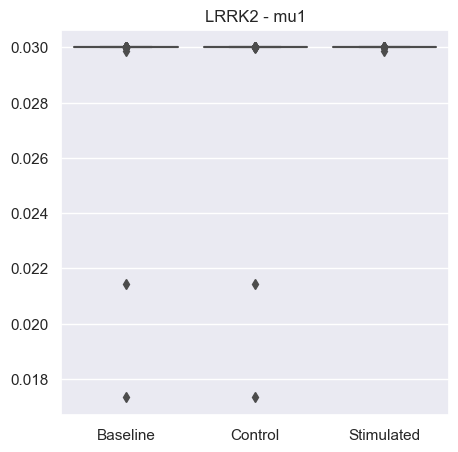

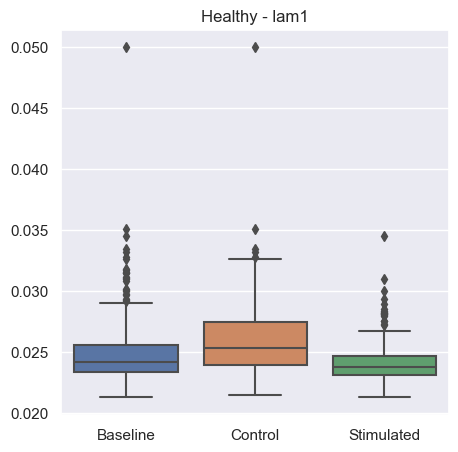

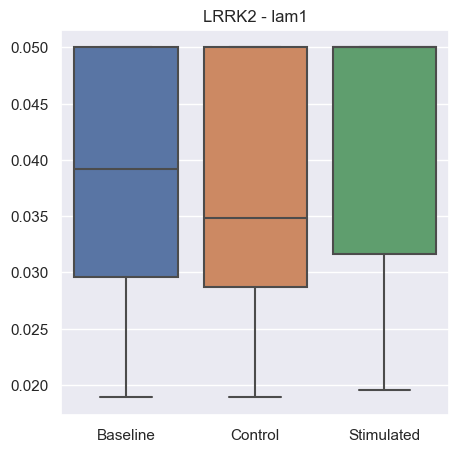

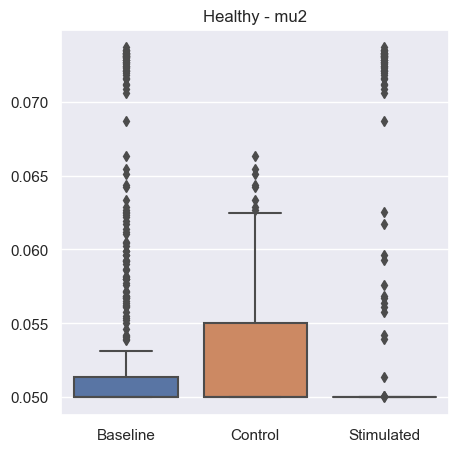

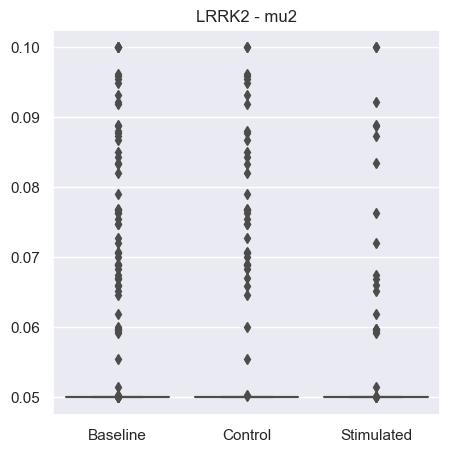

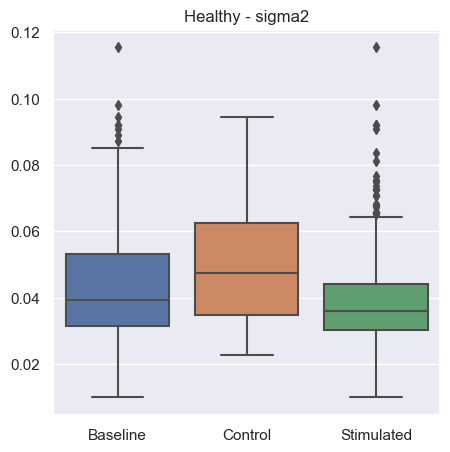

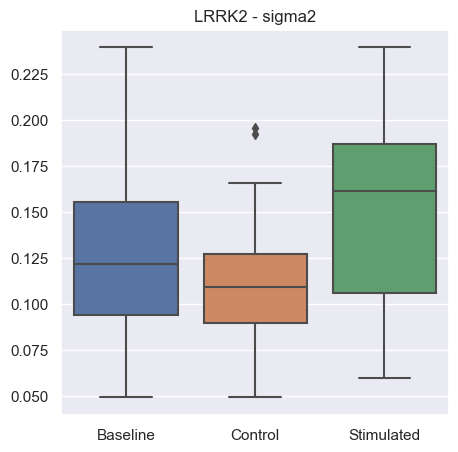

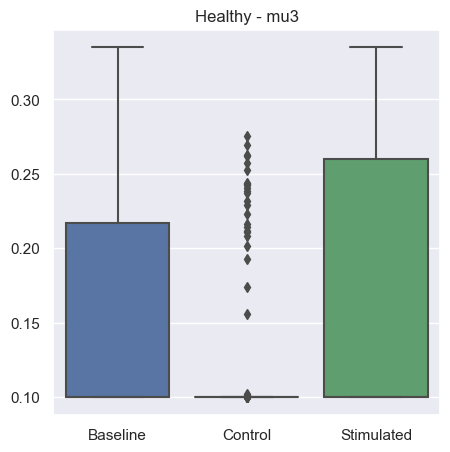

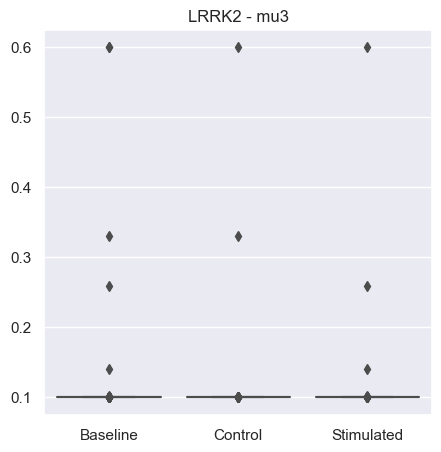

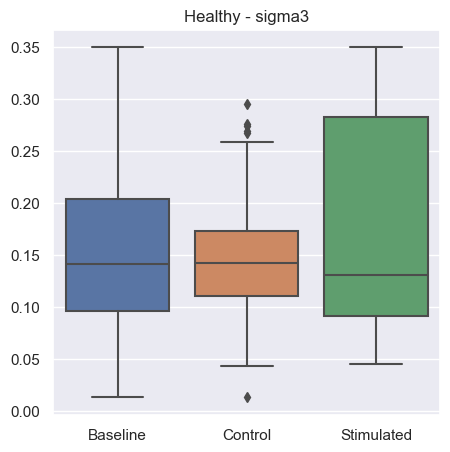

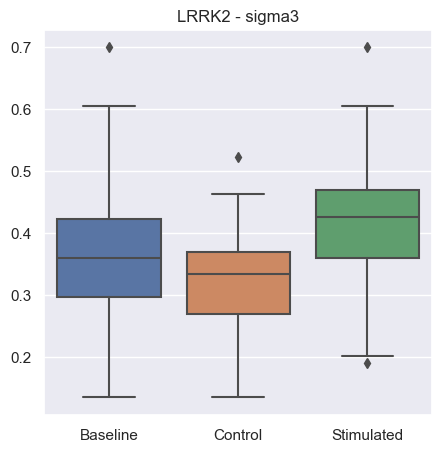

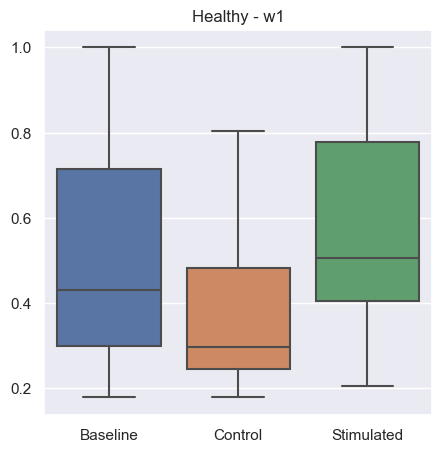

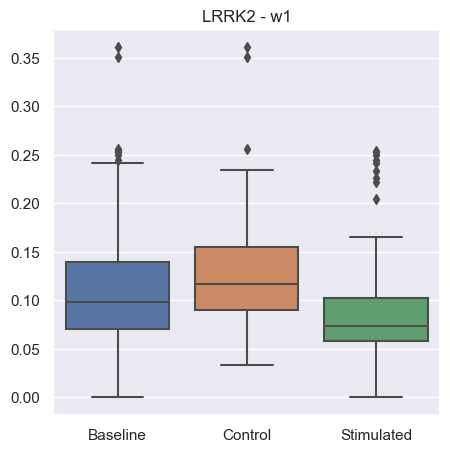

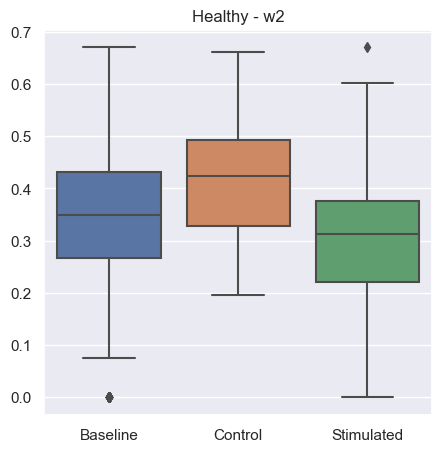

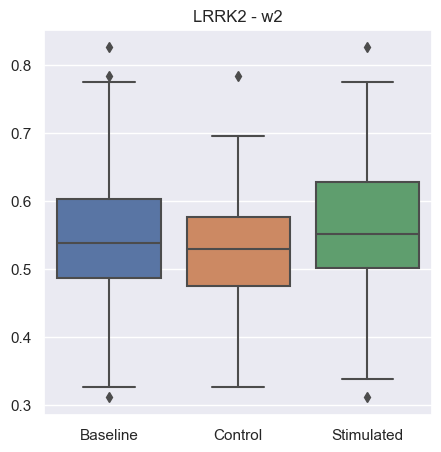

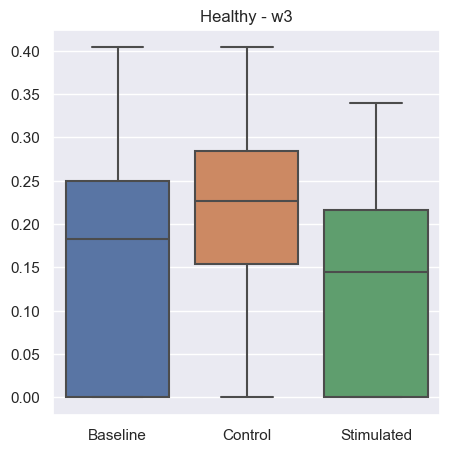

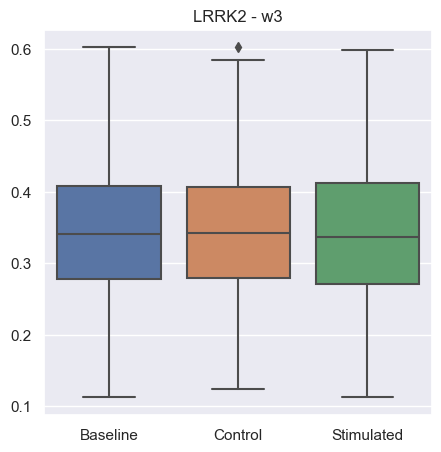

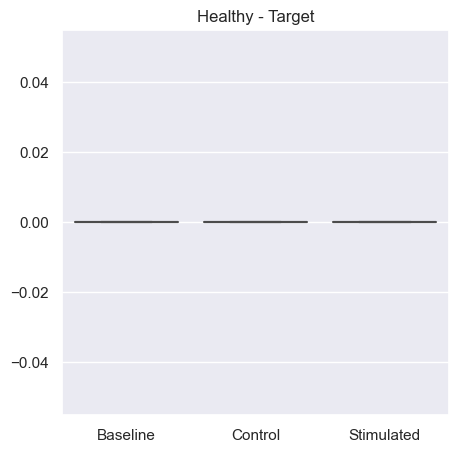

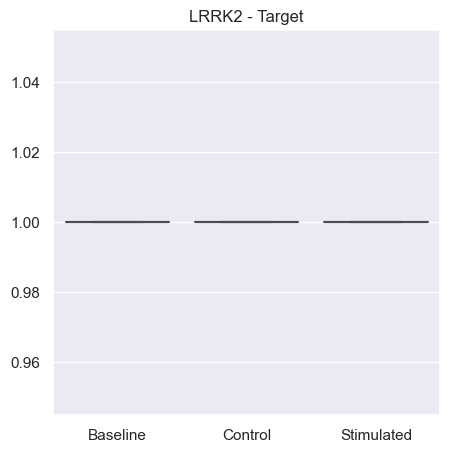

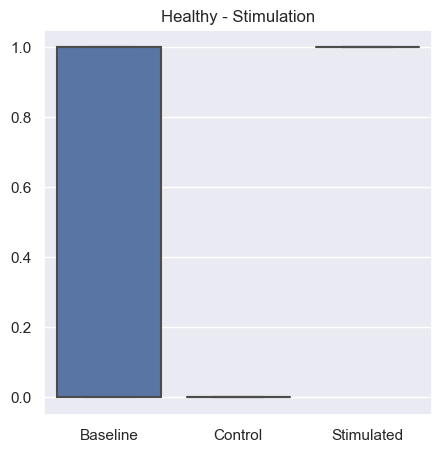

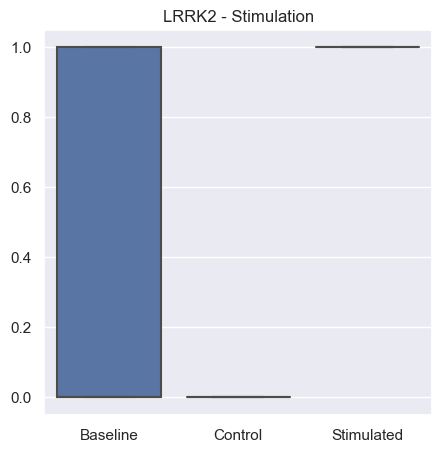

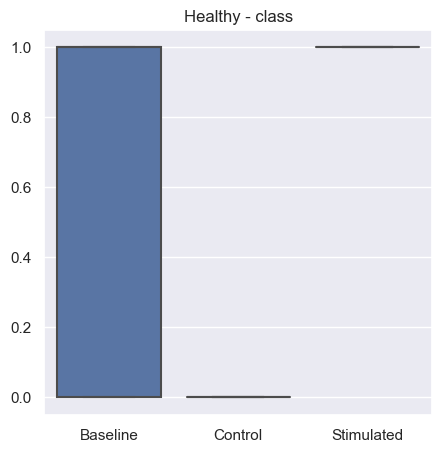

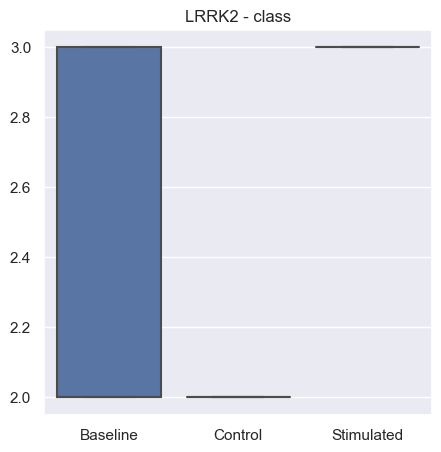

In [149]:
for col in dataset_after.columns.tolist():
    print(col)
    print('Healthy')
    t = plot_boxplot(0,col,dataset,dataset_after)
    print('LRRK2')
    t = plot_boxplot(1,col,dataset,dataset_after)
    print('\n\n')

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_boxplot(target, column, dataset, dataset_after):
    x_list_param_boxplot = []
    y_list_param_boxplot = []

    y_list_param_boxplot.extend(dataset[dataset['Target'] == target][column].values)
    len1 = len(y_list_param_boxplot)
    
    y_list_param_boxplot.extend(dataset_after[(dataset_after['Target'] == target) & (dataset_after['Stimulation'] == 0)][column].values)
    len2 = len(y_list_param_boxplot) - len1
    
    y_list_param_boxplot.extend(dataset_after[(dataset_after['Target'] == target) & (dataset_after['Stimulation'] == 1)][column].values)
    len3 = len(y_list_param_boxplot) - len1 - len2

    strs1 = ["Baseline"] * len1
    strs2 = ["Control"] * len2
    strs3 = ["Stimulated"] * len3

    x_list_param_boxplot.extend(strs1)
    x_list_param_boxplot.extend(strs2)
    x_list_param_boxplot.extend(strs3)

    plt.figure(figsize=(5, 5))
    
    if target == 0:
        title = 'Healthy - ' + column
    else:
        title = 'LRRK2 - ' + column
    plt.title(title)
    sns.boxplot(x=x_list_param_boxplot, y=y_list_param_boxplot)
    
    #return y_list_param_boxplot
    stat, p_original = stats.shapiro(y_list_param_boxplot[:len1])
    stat, p = stats.shapiro(y_list_param_boxplot[len1:len1+len2])
    if (p <= 0.05) and (p_original <= 0.05):
        stat, t = stats.mannwhitneyu(y_list_param_boxplot[:len1], y_list_param_boxplot[len1:len1+len2], alternative='two-sided')
        print('Control: ', t)
    else:
        stat, t = stats.ttest_ind(y_list_param_boxplot[:len1], y_list_param_boxplot[len1:len1+len2])
        print('Control: ', t)

    stat, p = stats.shapiro(y_list_param_boxplot[len1+len2:])
    if (p <= 0.05) and (p_original <= 0.05):
        stat, t = stats.mannwhitneyu(y_list_param_boxplot[:len1], y_list_param_boxplot[len1+len2:], alternative='two-sided')
        print('Stimulation: ', t)
    else:
        stat, t = stats.ttest_ind(y_list_param_boxplot[:len1], y_list_param_boxplot[len1+len2:])
        print('Stimulation: ', t)


In [31]:
def performance_visualizer(trials_obj,n_models,choice=False,**choice_var):
    
    import pandas as pd
    
    performance = [1-t['result']['loss'] for t in trials_obj.trials]
    
    
    hyperparam= list(trials_obj.trials[0]['misc']['vals'].keys())
    
    values_dict ={}
    
    for i in hyperparam:
        
        values_dict[i]=[]
        
        for j in trials_obj.trials:
            
            if(len(j['misc']['vals'][i])==0):
                
                values_dict[i].append(np.NaN)
                
            else:
            
                values_dict[i].append(j['misc']['vals'][i][0])
                
    out = pd.DataFrame.from_dict(values_dict)
    
    out['performance'] = performance
    
    out=out.sort_values(by=['performance'])
    
    
    if choice:
        
        for i in list(choice_var.keys()):
        
            for j,_ in enumerate(choice_var[i]):
        
                out[i]=out[i].replace(j,choice_var[i][j])
    
    return out.tail(n_models)